<a href="https://colab.research.google.com/github/Sachinsatya/fashion_MNIST_deep_learnign-/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf

In [ ]:
# Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Input   |   Output  
# Image   |   Label 
# x       |    y

In [ ]:
x_train.shape # 60K Images, 28x28 Grayscale Images

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

'\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n'

In [ ]:
category = {0	:"T-shirt/top",
1:  "Trouser",
2:	"Pullover",
3:	"Dress",
4:	"Coat",
5:	"Sandal",
6:	"Shirt",
7:	"Sneaker",
8:	"Bag",
9:	"Ankle boot"}

In [ ]:
category[0]

'T-shirt/top'

8


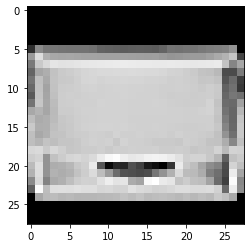

In [ ]:
num = 12500
plt.imshow(x_train[num], cmap='gray')
print(y_train[num])

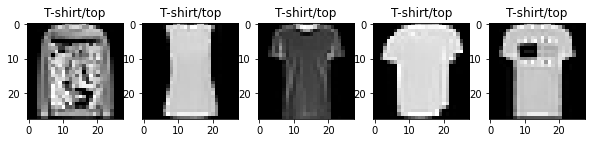

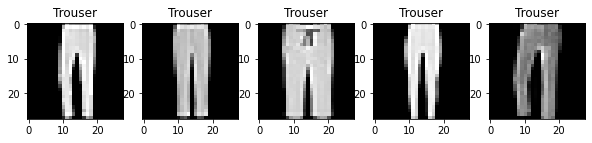

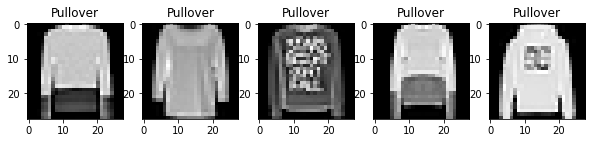

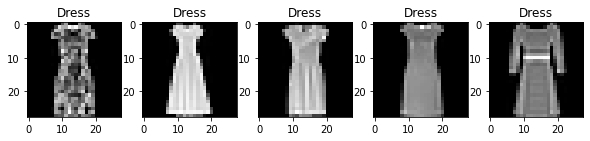

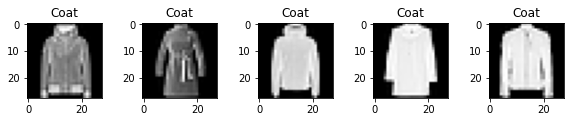

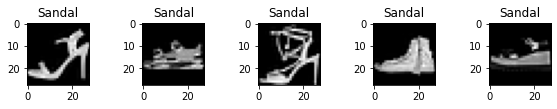

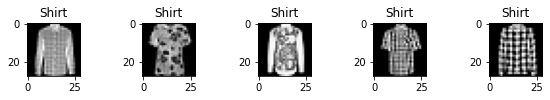

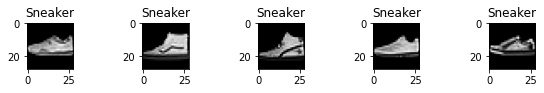

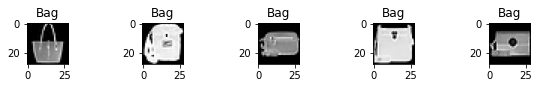

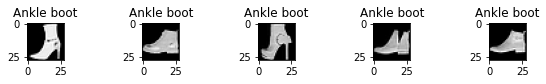

In [ ]:
for cat in range(10):
  # Collect Image Index from y_train
  index = np.random.choice(np.where(y_train == cat)[0], 5)
  plt.figure(figsize=(10, 8))
  for col in range(5):
    plt.subplot(cat + 1, 5, col+1)
    plt.imshow(x_train[index[col]], cmap='gray')
    plt.title(f"{category[cat]}")
  plt.show()

In [ ]:
 # Pre Processing (Input) {Scaling}
 x_train = x_train / 255.0

In [ ]:
# Pre Processing (Output) {Encoding}
y_train = tf.keras.utils.to_categorical(y_train)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
from keras.api._v2.keras import activations
# del model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((28, 28), name="Input"))
model.add(tf.keras.layers.Flatten(name='Flatten'))
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu, name="HiddenLayer"))
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax, name = "Output"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 HiddenLayer (Dense)         (None, 100)               78500     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, 
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
              metrics=["acc"])

In [ ]:
# ?model.fit

In [ ]:
model_history = model.fit(x_train, y_train, epochs=30, 
                          validation_split=0.1, batch_size=32)

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7804 - acc: 0.7501 - val_loss: 0.5776 - val_acc: 0.8050
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5306 - acc: 0.8212 - val_loss: 0.5138 - val_acc: 0.8220
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4827 - acc: 0.8346 - val_loss: 0.4671 - val_acc: 0.8370
Epoch 4/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4567 - acc: 0.8428 - val_loss: 0.4386 - val_acc: 0.8440
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4382 - acc: 0.8480 - val_loss: 0.4349 - val_acc: 0.8493
Epoch 6/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4232 - acc: 0.8537 - val_loss: 0.4205 - val_acc: 0.8498
Epoch 7/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4105 - acc: 0.8570 - val_loss: 0.4178 - val_acc: 0.8517
Epoch 8/30
1688/1688 [==============================] - 4s 2ms

In [ ]:
# number of Pixels in Fashion MNIST data
# One image 28 * 28
60000 * 28 * 28 #47M

47040000

In [ ]:
# Lets say if client shares images of shape 512x2048x3
512*2048*3 #3.1M for 1 image

3145728

In [ ]:
# Total Images - 60K
# Training - 54K 
# Val - 6K

# Each batch with have 32 images, batch_size = 32

In [ ]:
54_000 / 32
# 1688 batches are required for 54K images

1687.5

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

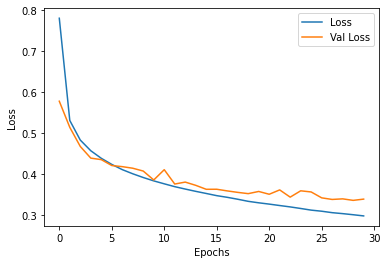

In [ ]:
plt.plot(model_history.history["loss"], label = "Loss")
plt.plot(model_history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

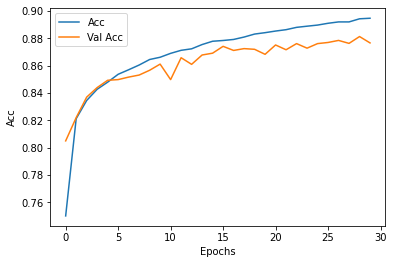

In [ ]:
plt.plot(model_history.history["acc"], label = "Acc")
plt.plot(model_history.history["val_acc"], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()